In [1]:
import os

!pip install matplotlib -q

import pandas as pd

## Data loading

In [2]:
!ls $HOME/ds-bowl-from-scratch/raw-data

sample_submission.csv test.csv              train_labels.csv
specs.csv             train.csv


In [3]:
home = os.environ['HOME']
home

'/Users/adam'

In [4]:
# os.path OR pathlib
home = os.path.join(os.environ['HOME'], 'ds-bowl-from-scratch', 'raw-data')
print(home)

/Users/adam/ds-bowl-from-scratch/raw-data


In [5]:
os.listdir(home)

['train_labels.csv',
 'test.csv',
 'specs.csv',
 'train.csv',
 'sample_submission.csv']

In [6]:
raw_data = {}

for fi in os.listdir(home):
    if 'csv' in fi:
        print(fi)
        raw_data[fi] = pd.read_csv(os.path.join(home, fi))

train_labels.csv
test.csv
specs.csv
train.csv
sample_submission.csv


## Basic data inspection

Look at all csvs

In [7]:
for name, df in raw_data.items():
    print(name, df.shape)
    print(df.columns)
    print(' ')

train_labels.csv (17690, 7)
Index(['game_session', 'installation_id', 'title', 'num_correct', 'num_incorrect', 'accuracy', 'accuracy_group'], dtype='object')
 
test.csv (1156414, 11)
Index(['event_id', 'game_session', 'timestamp', 'event_data', 'installation_id', 'event_count', 'event_code', 'game_time', 'title', 'type', 'world'], dtype='object')
 
specs.csv (386, 3)
Index(['event_id', 'info', 'args'], dtype='object')
 
train.csv (11341042, 11)
Index(['event_id', 'game_session', 'timestamp', 'event_data', 'installation_id', 'event_count', 'event_code', 'game_time', 'title', 'type', 'world'], dtype='object')
 
sample_submission.csv (1000, 2)
Index(['installation_id', 'accuracy_group'], dtype='object')
 


## Inspection of the target

Four classes

In [8]:
labels = raw_data['train_labels.csv']
set(labels.loc[:, 'accuracy_group'])

{0, 1, 2, 3}

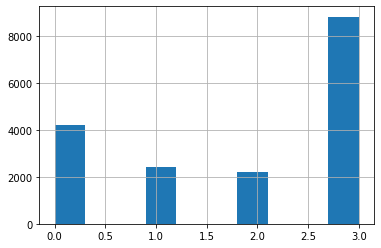

In [9]:
labels.loc[:, 'accuracy_group'].hist()

Number of installs

In [10]:
def inspect_df(data, csv):
    """
    show unique values in all cols of a df 
    
    data (dict)
    csv (str)
    """
    df = data[csv]
    for col in df.columns:
        print(col)
        uniq = len(set(df.loc[:, col]))
        print('num. uniques {}'.format(uniq))
        print(uniq / df.shape[0])
        print(' ')
        
inspect_df(raw_data, 'train_labels.csv')

game_session
num. uniques 17690
1.0
 
installation_id
num. uniques 3614
0.20429621254946298
 
title
num. uniques 5
0.0002826455624646693
 
num_correct
num. uniques 2
0.00011305822498586772
 
num_incorrect
num. uniques 46
0.0026003391746749578
 
accuracy
num. uniques 30
0.0016958733747880158
 
accuracy_group
num. uniques 4
0.00022611644997173544
 


In [11]:
raw_data.keys()

dict_keys(['train_labels.csv', 'test.csv', 'specs.csv', 'train.csv', 'sample_submission.csv'])

## Event code

The file train_labels.csv has been provided to show how these groups would be computed on the assessments in the training set. Assessment attempts are captured in event_code 4100 for all assessments except for Bird Measurer, which uses event_code 4110. If the attempt was correct, it contains "correct":true.

In [12]:
raw_data['train.csv']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
...,...,...,...,...,...,...,...,...,...,...,...
11341037,ab3136ba,c09b94eebfdf50a6,2019-10-10T15:11:15.584Z,"{""description"":""Tap another dinosaur."",""identi...",fffc0583,66,3110,118615,Dino Dive,Game,MAGMAPEAK
11341038,27253bdc,6ad8ab25003ef1b0,2019-10-10T15:12:17.364Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 2,Clip,CRYSTALCAVES
11341039,27253bdc,71904dca23b982c6,2019-10-10T15:13:04.713Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES
11341040,27253bdc,2267b18f069e875a,2019-10-10T15:13:54.545Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES


In [13]:
raw_data['train_labels.csv'].iloc[0, :]

game_session                   6bdf9623adc94d89
installation_id                        0006a69f
title              Mushroom Sorter (Assessment)
num_correct                                   1
num_incorrect                                 0
accuracy                                      1
accuracy_group                                3
Name: 0, dtype: object

In [17]:
def extract_game_session(data, idx):
    df = data['train_labels.csv']
    row = df.iloc[idx, :]
    return row.to_dict()

gs = extract_game_session(raw_data, 1000)
gs

{'game_session': '0bca967cb0dcc005',
 'installation_id': '0cc2a247',
 'title': 'Cart Balancer (Assessment)',
 'num_correct': 1,
 'num_incorrect': 0,
 'accuracy': 1.0,
 'accuracy_group': 3}

In [23]:
import json
def get_event_data(data, game_session_dict):
    df = data['train.csv']
    sub = df[df.loc[:, 'game_session'] == game_session_dict['game_session']]
    if 'Bird Measurer' in game_session_dict['title']:
        code = 4110
    else:
        code = 4100
        
    out = list(sub[sub.loc[:, 'event_code'] == code].loc[:, 'event_data'])
    
    return [json.loads(j) for j in out]

event_data = get_event_data(raw_data, gs)

event_data

[{'correct': True,
  'left': [{'id': 'gem05', 'weight': 4},
   {'id': 'gem01', 'weight': 1},
   {'id': 'gem03', 'weight': 3},
   {'id': 'gem07', 'weight': 6}],
  'right': [{'id': 'gem06', 'weight': 4},
   {'id': 'gem02', 'weight': 1},
   {'id': 'gem04', 'weight': 3},
   {'id': 'gem08', 'weight': 6}],
  'event_count': 23,
  'game_time': 28667,
  'event_code': 4100}]

In [27]:
gs

{'game_session': '0bca967cb0dcc005',
 'installation_id': '0cc2a247',
 'title': 'Cart Balancer (Assessment)',
 'num_correct': 1,
 'num_incorrect': 0,
 'accuracy': 1.0,
 'accuracy_group': 3}

In [29]:
event['correct']

True

In [33]:
# def check_labels(game_session_dict, event_data)
game_session_dict = gs
corr, incorr = [], []
for event in event_data:
    if event['correct']:
        corr.append(1)
    else:
        incorr.append(1)
        
assert sum(corr) == game_session_dict['num_correct']
assert sum(incorr) == game_session_dict['num_incorrect']

corr

[1]

In [ ]:
for i in range(10):
    gs = extract_game_session(raw_data, i)
    out = get_event_data(raw_data, gs)
    
    if out.shape[0] > 1:
        break

In [ ]:
import json

json.loads(raw_data['train.csv'].loc[:, 'event_data'].iloc[1000])

In [ ]:
raw_data['sample_submission.csv'].head()

In [ ]:
len(set(raw_data['train_labels.csv'].loc[:, 'installation_id']))

In [ ]:
raw_data['train.csv'].shape

In [ ]:
len(set(raw_data['train.csv'].loc[:, 'game_session']))

In [ ]:
len(set(raw_data['train.csv'].loc[:, 'installation_id']))

In [ ]:
df = raw_data['train_labels.csv']

mask = df['accuracy_group'] == 3
mask = df.loc[:, 'accuracy_group'] == 3

sub = df.loc[mask, :]

sub.head()

In [ ]:
set(sub.loc[:, 'num_correct'])

In [ ]:
set(df.loc[:, 'num_correct'])

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
# hardness of games

In [ ]:
!pip install seaborn -q
import seaborn as sns

sns.pairplot(data['train_labels.csv'])

In [ ]:
mask = df['num_correct'] == 1

mask

In [ ]:
mask2 = df['num_incorrect'] > 0

df.loc[mask & mask2, :].loc[:, 'num_incorrect'].hist()

In [ ]:
max(df.loc[mask & mask2, :].loc[:, 'num_incorrect'])